# Using Exploratory Data Analysis to Understand the Arrhythmia Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

The aim here is to load the dataset into *arrhythmia_data* and remove the labels into *arrhythmia_labels*

In [4]:
arrhythmia_data = pd.read_csv("arrhythmia.data", header=None)
arrhythmia_labels = arrhythmia_data[279]
arrhythmia_data.drop(columns=[279], inplace=True)
print(arrhythmia_data.head())
print(arrhythmia_labels[:5])

   0    1    2    3    4    5    6    7    8    9    ...  269  270   271  272  \
0   75    0  190   80   91  193  371  174  121  -16  ... -0.3  0.0   9.0 -0.9   
1   56    1  165   64   81  174  401  149   39   25  ... -0.5  0.0   8.5  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.9  0.0   9.5 -2.4   
3   55    0  175   94  100  202  380  179  143   28  ...  0.1  0.0  12.2 -2.2   
4   75    0  190   80   88  181  360  177  103  -16  ... -0.4  0.0  13.1 -3.6   

   273  274  275  276   277   278  
0  0.0  0.0  0.9  2.9  23.3  49.4  
1  0.0  0.0  0.2  2.1  20.4  38.8  
2  0.0  0.0  0.3  3.4  12.3  49.0  
3  0.0  0.0  0.4  2.6  34.6  61.6  
4  0.0  0.0 -0.1  3.9  25.4  62.8  

[5 rows x 279 columns]
0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64


## Describe the dataset

According to the source, the data contains

1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners of Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

       -- 2. Burak Acar, M.S.,
             Bilkent University, 
             EE Eng. Dept. 
             06533 Ankara, Turkey
             Email: buraka@ee.bilkent.edu.tr

       -- 2. Haldun Muderrisoglu, M.D., Ph.D., 
             Baskent University, 
             School of Medicine
             Ankara, Turkey

   (b) Donor: H. Altay Guvenir
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date: January, 1998

3. Past Usage:
   1. H. Altay Guvenir, Burak Acar, Gulsen Demiroz, Ayhan Cekin
      "A Supervised Machine Learning Algorithm for Arrhythmia Analysis"
      Proceedings of the Computers in Cardiology Conference, 
      Lund, Sweden, 1997.
      
      The aim is to determine the type of arrhythmia from 
      the ECG recordings.

4. Relevant Information:
     This database contains 279 attributes, 206 of which are linear
     valued and the rest are nominal. 

     Concerning the study of H. Altay Guvenir: "The aim is to distinguish
     between the presence and absence of cardiac arrhythmia and to
     classify it in one of the 16 groups. Class 01 refers to 'normal'
     ECG classes 02 to 15 refers to different classes of arrhythmia
     and class 16 refers to the rest of unclassified ones. For the
     time being, there exists a computer program that makes such a
     classification. However there are differences between the
     cardiolog's and the programs classification. Taking the
     cardiolog's as a gold standard we aim to minimise this difference
     by means of machine learning tools."

     The names and id numbers of the patients were recently 
     removed from the database.

5. Number of Instances: 452

6. Number of Attributes: 279

7. Attribute Information:
   -- Complete attribute documentation:
      1 Age: Age in years , linear
      2 Sex: Sex (0 = male; 1 = female) , nominal
      3 Height: Height in centimeters , linear
      4 Weight: Weight in kilograms , linear
      5 QRS duration: Average of QRS duration in msec., linear
      6 P-R interval: Average duration between onset of P and Q waves
        in msec., linear
      7 Q-T interval: Average duration between onset of Q and offset
        of T waves in msec., linear
      8 T interval: Average duration of T wave in msec., linear
      9 P interval: Average duration of P wave in msec., linear
     Vector angles in degrees on front plane of:, linear
     10 QRS
     11 T
     12 P
     13 QRST
     14 J

     15 Heart rate: Number of heart beats per minute ,linear
    
     Of channel DI:
      Average width, in msec., of: linear
      16 Q wave
      17 R wave
      18 S wave
      19 R' wave, small peak just after R
      20 S' wave

      21 Number of intrinsic deflections, linear

      22 Existence of ragged R wave, nominal
      23 Existence of diphasic derivation of R wave, nominal
      24 Existence of ragged P wave, nominal
      25 Existence of diphasic derivation of P wave, nominal
      26 Existence of ragged T wave, nominal
      27 Existence of diphasic derivation of T wave, nominal

     Of channel DII: 
      28 .. 39 (similar to 16 .. 27 of channel DI)
     Of channels DIII:
      40 .. 51
     Of channel AVR:
      52 .. 63
     Of channel AVL:
      64 .. 75
     Of channel AVF:
      76 .. 87
     Of channel V1:
      88 .. 99
     Of channel V2:
      100 .. 111
     Of channel V3:
      112 .. 123
     Of channel V4:
      124 .. 135
     Of channel V5:
      136 .. 147
     Of channel V6:
      148 .. 159

     Of channel DI:
      Amplitude , * 0.1 milivolt, of
      160 JJ wave, linear
      161 Q wave, linear
      162 R wave, linear
      163 S wave, linear
      164 R' wave, linear
      165 S' wave, linear
      166 P wave, linear
      167 T wave, linear
      
      168 QRSA , Sum of areas of all segments divided by 10,
          ( Area= width * height / 2 ), linear
      169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T
          wave. (If T is diphasic then the bigger segment is
          considered), linear

     Of channel DII:
      170 .. 179
     Of channel DIII:
      180 .. 189
     Of channel AVR:
      190 .. 199
     Of channel AVL:
      200 .. 209
     Of channel AVF:
      210 .. 219
     Of channel V1:
      220 .. 229
     Of channel V2:
      230 .. 239
     Of channel V3:
      240 .. 249
     Of channel V4:
      250 .. 259
     Of channel V5:
      260 .. 269
     Of channel V6:
      270 .. 279
      
8. Missing Attribute Values: Several.  Distinguished with '?'.

9. Class Distribution:
       Database:  Arrhythmia
       
       Class code :   Class   :                       Number of instances:
       01             Normal				          245
       02             Ischemic changes (Coronary Artery Disease)   44
       03             Old Anterior Myocardial Infarction           15
       04             Old Inferior Myocardial Infarction           15
       05             Sinus tachycardy			           13
       06             Sinus bradycardy			           25
       07             Ventricular Premature Contraction (PVC)       3
       08             Supraventricular Premature Contraction	    2
       09             Left bundle branch block 		            9	
       10             Right bundle branch block		           50
       11             1. degree AtrioVentricular block	            0	
       12             2. degree AV block		            0
       13             3. degree AV block		            0
       14             Left ventricule hypertrophy 	            4
       15             Atrial Fibrillation or Flutter	            5
       16             Others				           22


In [5]:
arrhythmia_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


## The 'Age' Factor

The first parameter in the dataset is the age.

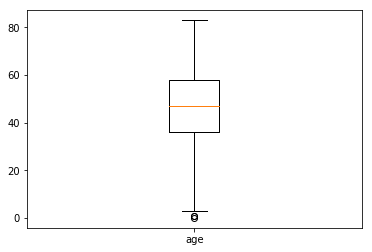

In [15]:
plt.boxplot(arrhythmia_data[0],labels=["age"])
plt.show()